Single hidden layer Neural Network:


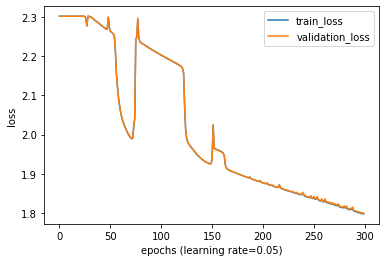

Accuracy: 33.7 %
[[552   0   0   0   0  52   0  18  31 347]
 [ 62   0   0   0   0  38   0   2   2 896]
 [576   0   0   0   0  40   0  63  34 287]
 [188   0   0   0   0  38   0  18  10 746]
 [696   0   0   0   0  35   0  36  20 213]
 [  0   0   0   0   0   0   0 826   9 165]
 [426   0   0   0   0  47   0  77  54 396]
 [  0   0   0   0   0   0   0 889   0 111]
 [  9   0   0   0   0   2   0  15 968   6]
 [  0   0   0   0   0   0   0  38   1 961]]
Multi layer Neural Network:


c:\users\harshali\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:128: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Train on 40199 samples, validate on 19801 samples
Epoch 1/50
40199/40199 [==============================] - 9s 234us/step - loss: 1.0162 - accuracy: 0.6473 - val_loss: 0.5185 - val_accuracy: 0.8218
Epoch 2/50
40199/40199 [==============================] - 7s 173us/step - loss: 0.6917 - accuracy: 0.7711 - val_loss: 0.4547 - val_accuracy: 0.8407
Epoch 3/50
40199/40199 [==============================] - 7s 185us/step - loss: 0.6314 - accuracy: 0.7938 - val_loss: 0.4331 - val_accuracy: 0.8518
Epoch 4/50
40199/40199 [==============================] - 8s 190us/step - loss: 0.6076 - accuracy: 0.8020 - val_loss: 0.4272 - val_accuracy: 0.8531
Epoch 5/50
40199/40199 [==============================] - 9s 212us/step - loss: 0.5957 - accuracy: 0.8063 - val_loss: 0.4239 - val_accuracy: 0.8492
Epoch 6/50
40199/40199 [==============================] - 8s 199us/step - loss: 0.5787 - accuracy: 0.8124 - val_loss: 0.4117 - val_accuracy: 0.8580
Epoch 7/50
40199/40199 [==============================] - 8s 1

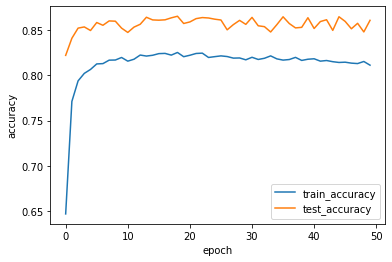

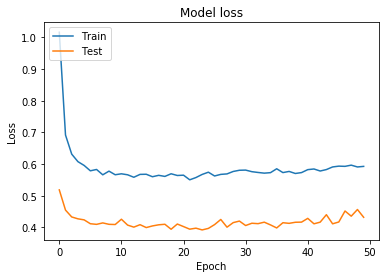

[[772   0  12  70   2   3 135   0   5   1]
 [  0 943   5  44   3   0   5   0   0   0]
 [  5   0 724  12 161   0  97   0   1   0]
 [ 22   3  10 906  22   1  33   0   3   0]
 [  0   0  69  52 808   0  68   0   3   0]
 [  0   0   0   0   0 933   0  51   1  15]
 [182   1  90  45 105   0 570   1   6   0]
 [  0   0   0   0   0  20   0 949   0  31]
 [  1   1   5   6  12   5  30   7 933   0]
 [  1   0   0   0   0  14   0  53   0 932]]
Convolutional Neural Network:
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 - 133s - loss: 0.5890 - accuracy: 0.7958 - val_loss: 0.4028 - val_accuracy: 0.8572
Epoch 2/10
54000/54000 - 142s - loss: 0.3910 - accuracy: 0.8605 - val_loss: 0.3514 - val_accuracy: 0.8728
Epoch 3/10
54000/54000 - 136s - loss: 0.3433 - accuracy: 0.8787 - val_loss: 0.3173 - val_accuracy: 0.8840
Epoch 4/10
54000/54000 - 129s - loss: 0.3121 - accuracy: 0.8884 - val_loss: 0.3022 - val_accuracy: 0.8913
Epoch 5/10
54000/54000 - 130s - loss: 0.2895 - accuracy: 0.8954 - 

In [ ]:
import util_mnist_reader as mnist_reader
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
import sklearn.metrics as metrics

from keras.models import Model
from keras.layers import Dense, Input, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
import keras

import tensorflow as tf

X_train, y_train = mnist_reader.load_mnist('data\\fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data\\fashion', kind='t10k')

def simple_nn(X_train, y_train, X_test, y_test):
    y_values = np.max(y_train) + 1
    y_train = np.eye(y_values)[y_train]

    y_val = np.max(y_test) + 1
    y_test_hot = np.eye(y_val)[y_test]

    train_samples = len(X_train)
    test_samples = len(X_test)

    bias = np.ones((train_samples,1))
    X_train = np.append(X_train, bias, 1)
    X_train = np.transpose(X_train)

    bias = np.ones((test_samples,1))
    X_test = np.append(X_test, bias, 1)
    X_test = np.transpose(X_test)

    input_nodes = len(X_train)
    output_nodes = 10
    nodes = 90
    W1 = np.zeros((nodes, input_nodes))
    W2 = np.zeros((output_nodes, nodes))

    def sigmoid(z):
        s = 1/(1+np.exp(-z))
        return s

    def compute_cost(A2, Y):
        m = Y.shape[0]
        logprobs = np.multiply(np.log(A2),Y)
        cost = (-1/m)*np.sum(np.sum(logprobs))      # check if you should be dividing this by m  
        cost = np.squeeze(cost)
        return cost

    def softmax(x):
        exps = np.exp(x)
        return exps / np.sum(exps, axis=0)

    train_loss = []
    validation_loss = []
    learning_rate = 0.05
    epochs = 600

    for i in range(epochs):
        z1 = np.dot(W1, X_train)
        a1 = sigmoid(z1)

        z2 = np.dot(W2, a1)
        a2 = np.transpose(softmax(z2))

        z1_v = np.dot(W1, X_test)
        a1_v = sigmoid(z1_v)

        z2_v = np.dot(W2, a1_v)
        a2_v = np.transpose(softmax(z2_v))

        cost_v = compute_cost(a2_v, y_test_hot)
        validation_loss.append(np.squeeze(cost_v))

        cost = compute_cost(a2, y_train)
        train_loss.append(np.squeeze(cost))

        dz2 = a2 - y_train
        diff_W2 = (1./train_samples) * np.dot(np.transpose(dz2), np.transpose(a1))

        da1 = np.transpose(np.dot(dz2, W2))
        dz1 = np.multiply(da1, np.multiply(a1, (1 - a1)))
        diff_W1 = (1./train_samples) * np.dot(dz1, np.transpose(X_train))

        W1 = W1 - diff_W1 * learning_rate
        W2 = W2 - diff_W2 * learning_rate

    fig = plt.figure()
    plt.plot(range(len(train_loss)), train_loss, label='train_loss')
    plt.plot(range(len(validation_loss)), validation_loss, label='validation_loss')
    plt.legend()
    plt.ylabel('loss')
    plt.xlabel('epochs (learning rate=' + str(learning_rate) + ')')
    plt.show()
    fig.savefig('loss vs epochs' + str(learning_rate) + '.jpg')

    ztest1 = np.dot(W1, X_test)
    atest1 = sigmoid(ztest1)

    ztest2 = np.dot(W2, atest1)
    atest2 = np.transpose(softmax(ztest2))

    predicted_values = np.argmax(atest2, axis=1)
    testacc = accuracy_score(y_test, predicted_values)*100
    print("Accuracy: " + str(testacc) + " %")

    matrix = metrics.confusion_matrix(y_test, predicted_values)
    print(matrix)

print('Single hidden layer Neural Network:')
simple_nn(X_train, y_train, X_test, y_test)

def multilayer_nn(x_train, y_train, x_test, y_test):
    def simple_model(x_train, y_train):
        inputs = Input(shape=(784,))
        x = BatchNormalization()(inputs)
        x = Dropout(0.2)(x)
        x = Dense(128, activation='relu')(x)
        x = Dropout(0.5)(x)
        x = Dense(256, activation='relu')(x)
        x = Dropout(0.5)(x)
        x = Dense(128, activation='relu')(x)
        x = Dropout(0.5)(x)
        predictions = Dense(10, activation='softmax')(x)
        model = Model(input=inputs, output=predictions)
        model.compile(loss=keras.losses.categorical_crossentropy,
                 optimizer=keras.optimizers.Adadelta(),
                 metrics=['accuracy'])
        history = model.fit(x_train, to_categorical(y_train), epochs=50, shuffle=True, validation_split=0.33)
        return history
    
    def show_history(history):
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
        plt.show()

        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')
        plt.show()
        
    simple_history = simple_model(x_train, y_train)
    simple_history.model.evaluate(x_test, to_categorical(y_test))

    predictions = simple_history.model.predict(x_test)

    accuracy = metrics.accuracy_score(y_test, predictions.argmax(axis=1))
    matrix = metrics.confusion_matrix(y_test, predictions.argmax(axis=1))
    print('Accuracy: ' + str(accuracy*100) + '%')
    show_history(simple_history)
    print(matrix)

print('Multi layer Neural Network:')
multilayer_nn(X_train, y_train, X_test, y_test)

def cnn(X_train, y_train, X_test, y_test):
    X_train = X_train.reshape([-1, 28, 28, 1])
    X_test = X_test.reshape([-1, 28, 28, 1])
    X_train = X_train/255
    X_test = X_test/255

    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (5, 5), padding="same", input_shape=[28, 28, 1]),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Conv2D(64, (5, 5), padding="same"),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    y_binary = to_categorical(y_train)
    model.compile(tf.keras.optimizers.Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_binary, validation_split=0.10, batch_size=64, epochs=10, verbose=2)

    predictions = model.predict(X_test)

    matrix = metrics.confusion_matrix(y_test, predictions.argmax(axis=1))

    accuracy = metrics.accuracy_score(y_test, predictions.argmax(axis=1))
    
    def show_history(history):
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
        plt.show()

        # Plot training & validation loss values
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.show()

    show_history(history)
    print(matrix)
    print('Accuracy: ' + str(accuracy*100) + '%')

print('Convolutional Neural Network:')
cnn(X_train, y_train, X_test, y_test)